1. Use the Iris dataset and the SVM code shown in the first class. Define two
new features using the original four features and then calculate the accuracy score of
classification. The SVM classifier must use the new features and none of the original
features for classification

The SVM classifier uses two new features: the approximate sepal area (the product of the sepal length and sepal width) and the approximate petal area (the product of the petal length and petal width). The accuracy score was 0.95. 

In [1]:
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()
# iris.data
sepal_area = iris.data[:, 0]*iris.data[:,1]
petal_area = iris.data[:, 2]*iris.data[:,3]
X = np.column_stack((sepal_area, petal_area))
y = iris.target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(
    X,y,
    test_size=0.40,
    train_size=0.60,
    random_state=123,
    shuffle=True,
    stratify=y)

from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

preds = clf.predict(X_test)
print(preds)

print('actual iris species')
print(y_test)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,clf.predict(X_test) )
print('accuracy score :', acc)

[1 1 1 1 0 2 1 0 0 2 0 2 2 2 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
actual iris species
[1 1 1 1 0 1 2 0 0 2 0 2 2 1 2 0 1 2 0 2 2 0 1 0 0 2 1 0 0 0 0 0 1 2 0 1 1
 2 0 1 0 2 2 2 0 2 2 1 0 0 1 1 2 1 2 1 1 2 1 2]
accuracy score : 0.95


2. Classify only the even numbered handwritten digits using MNIST digits dataset
with a k-nearest neighbors classifier. The classifier must not see any odd numbered digit
images as inputs. The classifier must also consider every pixel in the input image to
make its classification decision. Can we use pairplot to visualize this data? Plot the
classification results using a heatmap showing digits which were correctly classified and
digits which were not correctly classified. How many 6’s in your test set were correctly
classified?

shape of image object (1797, 8, 8)
shape of target object (1797,)
[[ 0.  0.  0.  0. 14. 13.  1.  0.]
 [ 0.  0.  0.  5. 16. 16.  2.  0.]
 [ 0.  0.  0. 14. 16. 12.  0.  0.]
 [ 0.  1. 10. 16. 16. 12.  0.  0.]
 [ 0.  3. 12. 14. 16.  9.  0.  0.]
 [ 0.  0.  0.  5. 16. 15.  0.  0.]
 [ 0.  0.  0.  4. 16. 14.  0.  0.]
 [ 0.  0.  0.  1. 13. 16.  1.  0.]]
1


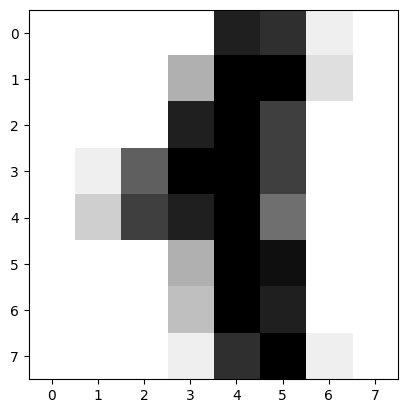

In [51]:
from sklearn import datasets
from keras.datasets import mnist
import numpy as np

digits = datasets.load_digits()
images = digits.images
targets = digits.target

print("shape of image object", images.shape)
print("shape of target object", targets.shape)

import matplotlib.pyplot as plt 
plt.imshow(images[11], cmap=plt.cm.gray_r, interpolation="nearest") # change images[0] to see different
print(images[11]) 
print(targets[11])

# NOTES: there are 1797 different images (indexed from 0 to 1796). image[0] to image[9] correspond to
# digits 0 to 9. Following this, all indexes ending in 0 are 0's, all indexes ending in 1 are 1's, etc. 

training images shapes:  (60000, 28, 28)
testing images shapes:  (10000, 28, 28)
training targets shapes:  (60000,)
testing targets shapes:  (10000,)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  

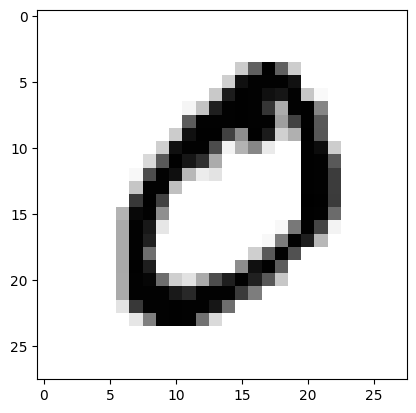

In [69]:
from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("training images shapes: ", X_train.shape)
print("testing images shapes: ", X_test.shape)
print("training targets shapes: ", y_train.shape)
print("testing targets shapes: ", y_test.shape)

plt.imshow(X_train[1], cmap=plt.cm.gray_r, interpolation="nearest")
print(X_train[1])
print(y_train[1])

# the images are the input x data and the label of what the images are, are the output target data y such as 0, 1, 2, 3, 4, 5

In [70]:
# to filter to only train using the even-numbered digits
mask = (y_train % 2 == 0)
X_train_evens = X_train[mask]
y_train_evens = y_train[mask]

X_train_evens = X_train_evens.reshape(X_train_evens.shape[0], -1)
y_train_evens = y_train_evens.reshape(y_train_evens.shape[0], -1)

print(X_train_evens.shape)
print(y_train_evens.shape)

(29492, 784)
(29492, 1)


In [72]:
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = y_test.reshape(y_test.shape[0], -1)

print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000, 1)


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

knn = KNeighborsClassifier(n_neighbors = 3, p=2)
knn.fit(X_train_evens, y_train_evens)

c:\Users\jub\Desktop\Spring 2025\Machine Learning for Engineers\.venv\lib\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=3)

In [74]:
knn.score(X_test, y_test)

0.4861

I got an accuracy score of 0.4861, which I believe makes sense given that the model was trained only with the even integers as inputs which is about half of the total distribution of data. 

In [75]:
knn.predict(X_test)

array([2, 2, 4, ..., 4, 8, 6], dtype=uint8)

In [76]:
cm = confusion_matrix(y_test, knn.predict(X_test))

Text(95.72222222222221, 0.5, 'Truth')

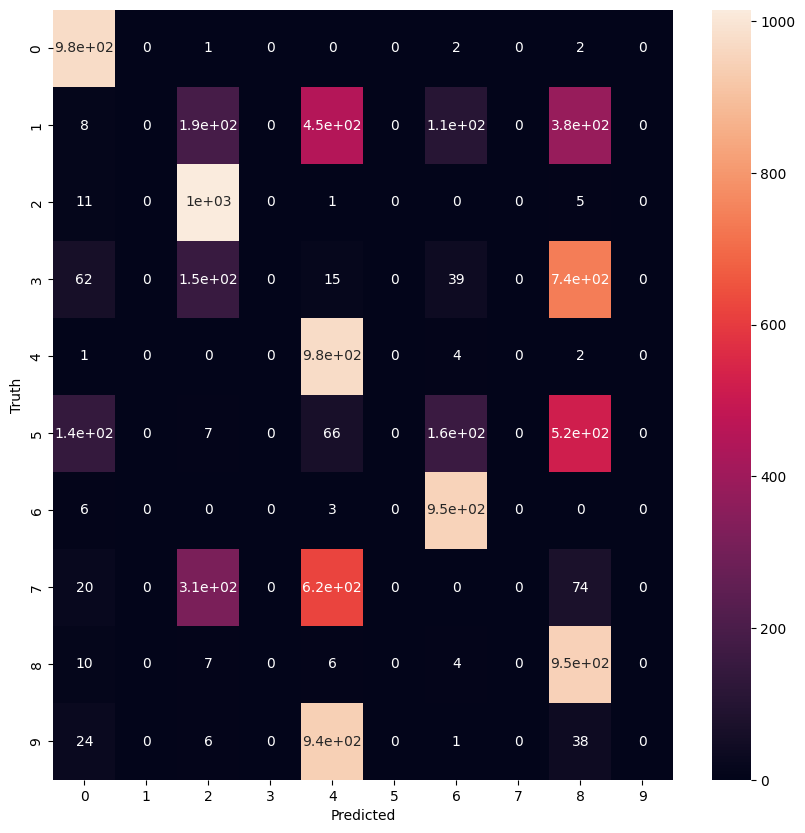

In [77]:
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

Form the heat ma, about 950 6's were correctly classified out of the entire population of the test data. Given the test population size of 10,000 data points and an equal distribution of each digit, out of 1000 6's, 950 were correctly classified. 

3. Cluster the Iris species by writing your own k-means algorithm using THREE
features (Or modify the algorithm we used in class). Show visualization of the data
using a THREE dimensional scatter plot. Compare the clustering performance of your
k-means algorithm to the sklearn implementation by making plots of the clusters from
your method and Scikit’s implementation by showing the clusters from your methods
and from Scikit’s method. What happens when you vary the number of clusters?

In [37]:
from sklearn.datasets import load_iris
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Preparing the Data
data = load_iris()
df = pd.DataFrame()
df['sepal length'] = data['data'][:,0]
df['sepal width'] = data['data'][:,1]
df['petal length'] = data['data'][:,2]
df['petal width'] = data['data'][:,3]
display(df)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [39]:
X = df.to_numpy() # converts DataFrame to array. these are the features
df['target'] = data['target']

named_targets = []
for elm in df['target'].to_list():
    named_targets.append(data.target_names[elm])

df['species_name'] = named_targets

In [60]:
df

,sepal length,sepal width,petal length,petal width,target,species_name,tag
0,5.1,3.5,1.4,0.2,0,setosa,train
1,4.9,3.0,1.4,0.2,0,setosa,train
2,4.7,3.2,1.3,0.2,0,setosa,test
3,4.6,3.1,1.5,0.2,0,setosa,train
4,5.0,3.6,1.4,0.2,0,setosa,train
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,train
146,6.3,2.5,5.0,1.9,2,virginica,test
147,6.5,3.0,5.2,2.0,2,virginica,train
148,6.2,3.4,5.4,2.3,2,virginica,train


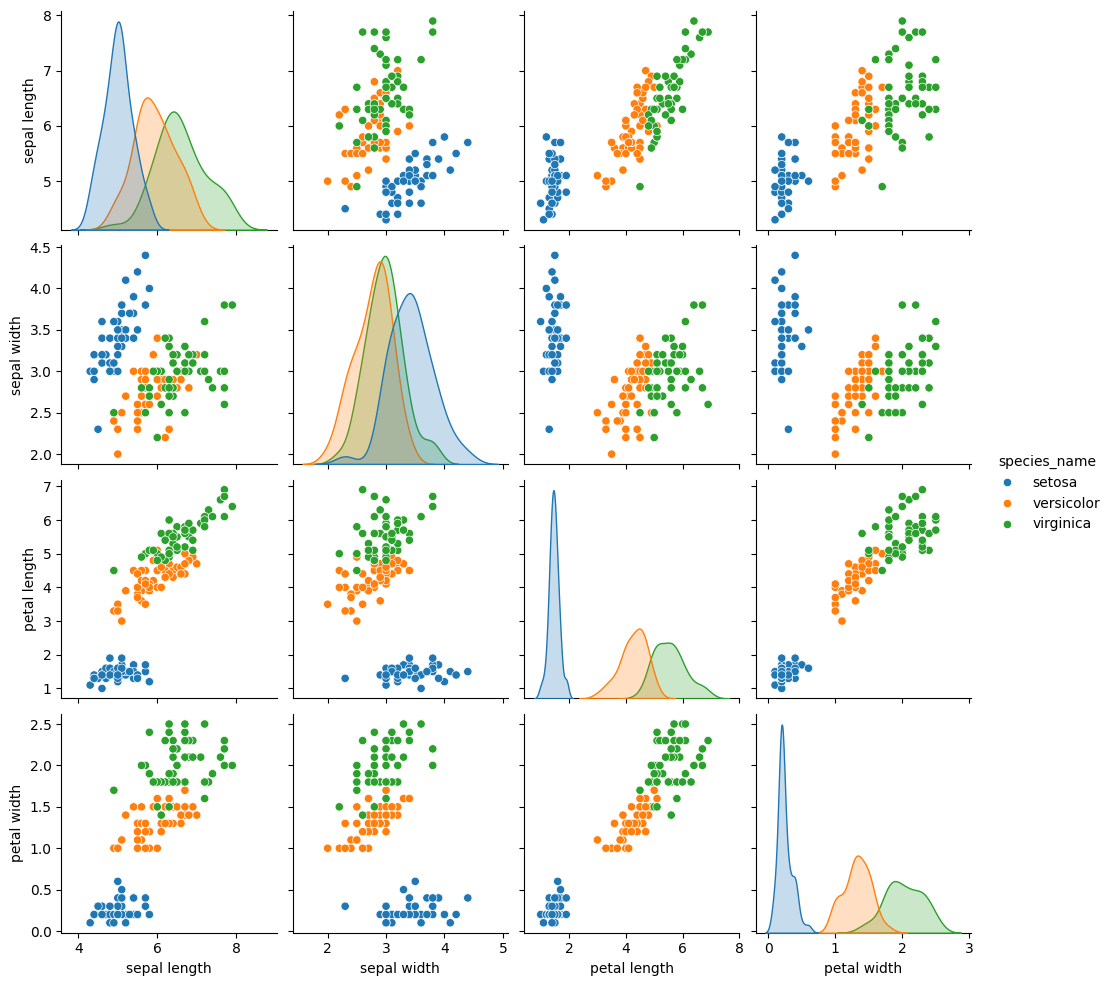

In [40]:
sns.pairplot(df.drop(labels=['target'],axis=1), hue='species_name')

C:\Users\jub\AppData\Local\Temp\ipykernel_10652\4068426844.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


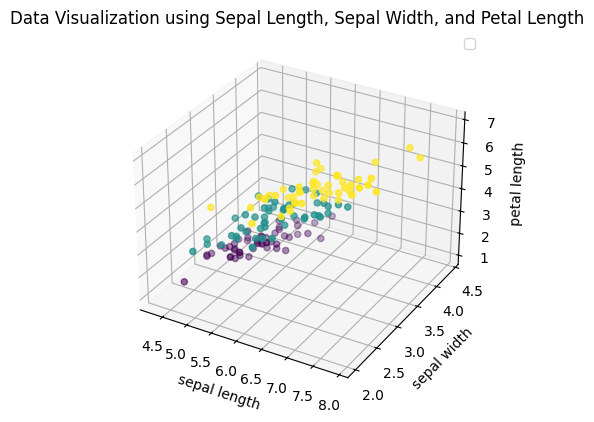

In [ ]:
# Scatter plot for 3 features
from mpl_toolkits import mplot3d
ax = plt.axes(projection="3d")
ax.scatter3D(df['sepal length'], df['sepal width'], df['petal length'], c=df['target'], cmap = "viridis") # c are the targets, when its different, it will be in different colors. cmap = "viridis" is just the coloring setting
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.title('Data Visualization using Sepal Length, Sepal Width, and Petal Length')
plt.legend()
plt.show()

In [91]:
# splitting the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test =train_test_split(
    X,
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True)

print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)

X_train shape : (105, 5)
X_test shape : (45, 5)


In [92]:
y = df['target'].to_numpy()
X_train, X_test, y_train, y_test, idx_train, idx_test=train_test_split(
    X,y, range(X.shape[0]),
    test_size=0.30,
    train_size=0.70,
    random_state=123,
    shuffle=True,
    stratify=y)
print('X_train shape :', X_train.shape)
print('X_test shape :', X_test.shape)
print('y_train shape :', y_train.shape)
print('y_test shape :', y_test.shape)

X_train shape : (105, 5)
X_test shape : (45, 5)
y_train shape : (105,)
y_test shape : (45,)


In [93]:
# K-means algorithm modified to have optionality between different types of norms
import numpy as np

class KMeans:
    def __init__(self, k, norm='euclidean', max_iter=250, tol=1e-4):
        self.k = k
        self.norm = norm
        self.max_iter = max_iter
        self.tol = tol
        self.centroids = None
        self.clusters = None

    def fit(self, X):
        # Initialize centroids randomly
        self.centroids = X[np.random.choice(X.shape[0], self.k, replace=False), :]

        for _ in range(self.max_iter):
            # Compute distances based on the chosen norm
            distances = self._compute_distances(X)

            # Assign clusters
            self.clusters = np.argmin(distances, axis=0)

            # Calculate new centroids
            new_centroids = np.array([X[self.clusters == i].mean(axis=0) if np.any(self.clusters == i) else self.centroids[i] for i in range(self.k)])

            # Check for convergence
            if np.all(np.linalg.norm(new_centroids - self.centroids, axis=1) < self.tol):
                break

            self.centroids = new_centroids

    def predict(self, X):
        distances = self._compute_distances(X)
        return np.argmin(distances, axis=0)

    def _compute_distances(self, X):
        if self.norm == 'manhattan':
            return np.array([np.sum(np.abs(X - centroid), axis=1) for centroid in self.centroids])
        elif self.norm == 'euclidean':
            return np.array([np.linalg.norm(X - centroid, axis=1) for centroid in self.centroids])
        elif self.norm == 'infinity':
            return np.array([np.max(np.abs(X - centroid), axis=1) for centroid in self.centroids])
        else:
            raise ValueError(f"Unsupported norm: {self.norm}")


In [101]:
# clustering with modified K-means
k_means_manhattan = KMeans(k=3, norm="manhattan")
k_means_manhattan.fit(X_train)
kmeans_labels = k_means_manhattan.predict(X)
cluster_coords = k_means_manhattan.centroids
print('predicted labels:', kmeans_labels)
print('cluster centroids:', cluster_coords)

predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
cluster centroids: [[6.56470588 2.94117647 5.52058824 2.01176471 2.        ]
 [5.04285714 3.43428571 1.48857143 0.26571429 0.        ]
 [5.86944444 2.75277778 4.23611111 1.31111111 1.02777778]]


In [95]:
y_train

array([1, 0, 1, 2, 0, 2, 0, 2, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0,
       2, 1, 0, 1, 0, 2, 2, 1, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 1, 1, 2, 1, 2, 2, 0, 0, 2, 2, 2,
       0, 2, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 0,
       1, 1, 2, 2, 0, 0, 1, 2, 1, 2, 1, 0, 1, 0, 0, 0, 2])

In [102]:
from sklearn.cluster import KMeans as SklearnKmeans
sklearn_kmeans = SklearnKmeans(n_clusters=3)
sklearn_labels = sklearn_kmeans.fit_predict(X) 
print('predicted labels:', sklearn_labels)


predicted labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


C:\Users\jub\AppData\Local\Temp\ipykernel_10652\3435024151.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


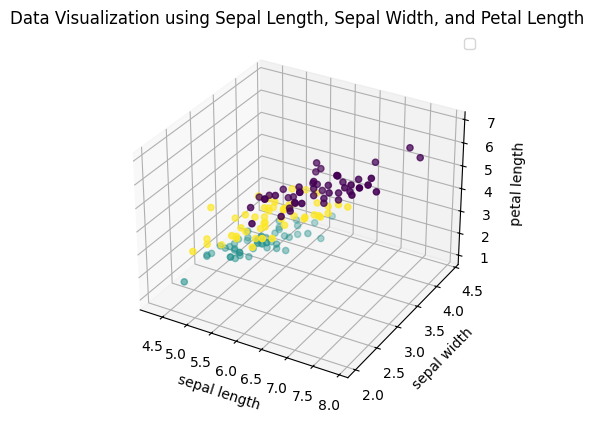

In [105]:
# Scatter plot for 3 features with labelling from K-means modified 
from mpl_toolkits import mplot3d
ax = plt.axes(projection="3d")
ax.scatter3D(df['sepal length'], df['sepal width'], df['petal length'], c=kmeans_labels, cmap = "viridis") # c are the targets, when its different, it will be in different colors. cmap = "viridis" is just the coloring setting
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.title('Data Visualization using Sepal Length, Sepal Width, and Petal Length')
plt.legend()
plt.show()

C:\Users\jub\AppData\Local\Temp\ipykernel_10652\273963001.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


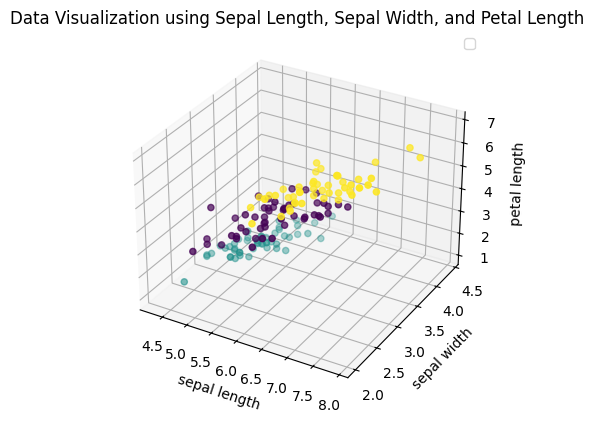

In [106]:
# Scatter plot for 3 features with labelling from K-means from SKlearn
from mpl_toolkits import mplot3d
ax = plt.axes(projection="3d")
ax.scatter3D(df['sepal length'], df['sepal width'], df['petal length'], c=sklearn_labels, cmap = "viridis") # c are the targets, when its different, it will be in different colors. cmap = "viridis" is just the coloring setting
ax.set_xlabel('sepal length')
ax.set_ylabel('sepal width')
ax.set_zlabel('petal length')
plt.title('Data Visualization using Sepal Length, Sepal Width, and Petal Length')
plt.legend()
plt.show()

In [ ]:
# What happens when the number of clusters is varied?
for k in [2, 3, 4, 5]:
    # Custom KMeans
    my_kmeans = KMeans(k=k, norm='euclidean', max_iter=300, tol=1e-4)  # Use the existing class
    my_kmeans.fit(X)  # Fit the data
    my_labels = my_kmeans.clusters  # Cluster labels
    my_centroids = my_kmeans.centroids  # Cluster centers

    # Scikit-learn KMeans
    sklearn_kmeans = SklearnKmeans(n_clusters=k, random_state=42)  # Scikit-learn KMeans
    sklearn_labels = sklearn_kmeans.fit_predict(X)
    sklearn_centroids = sklearn_kmeans.cluster_centers_

    print(f"\nNumber of Clusters: {k}")
    print(f"MyKMeans Cluster Centers:\n{my_centroids}")
    print(f"Scikit-learn Cluster Centers:\n{sklearn_centroids}")


Number of Clusters: 2
MyKMeans Cluster Centers:
[[6.2877551  2.88061224 4.94183673 1.68877551 1.51020408]
 [5.00576923 3.39038462 1.52692308 0.27692308 0.03846154]]
Scikit-learn Cluster Centers:
[[6.27373737 2.87575758 4.92525253 1.68181818 1.50505051]
 [5.00784314 3.40980392 1.49215686 0.2627451  0.01960784]]

Number of Clusters: 3
MyKMeans Cluster Centers:
[[5.006      3.428      1.462      0.246      0.        ]
 [5.91568627 2.76470588 4.26470588 1.33333333 1.01960784]
 [6.62244898 2.98367347 5.57346939 2.03265306 2.        ]]
Scikit-learn Cluster Centers:
[[6.624 2.984 5.562 2.026 1.98 ]
 [5.006 3.428 1.462 0.246 0.   ]
 [5.9   2.76  4.25  1.326 1.02 ]]

Number of Clusters: 4
MyKMeans Cluster Centers:
[[7.38571429 3.13571429 6.22857143 2.08571429 2.        ]
 [6.34324324 2.92972973 5.29189189 1.98918919 1.94594595]
 [5.87959184 2.75306122 4.23673469 1.32244898 1.02040816]
 [5.006      3.428      1.462      0.246      0.        ]]
Scikit-learn Cluster Centers:
[[6.23513514 2.845945

Both algorithms performed similarly with one another, classifying each data point similarly and having cluster centroids only hundredths away from one another. When the number of clusters is varied or increases beyond 3, the algorithm begins to be able to pick out outliers and begins to possibly overfit the data. 